In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [4]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [5]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [6]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [7]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

## Import Data in Certain Time Period

In [8]:
subject_name = 'indy'

if(subject_name=='ped'):
    rec_date = '2019-01-04'
    start_time = '11:37:01'
    end_time = '11:42:13'

if(subject_name=='pond'):
    rec_date = '2016-01-01'
    start_time = '07:42:14'
    end_time = '07:47:01'

if(subject_name=='indy'):
    rec_date = '2018-12-19'
    start_time = '16:17:05'
    end_time = '16:21:55'

In [9]:
filepath = 'SmartwatchData/raw_data/log_acc_' + subject_name + '.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2018-12-19 16:17:05.126,-8.742428,-3.938462,0.515950
1,2018-12-19 16:17:05.288,-8.814254,-3.507505,0.851139
2,2018-12-19 16:17:05.452,-9.010578,-4.407725,1.033098
3,2018-12-19 16:17:05.611,-8.838196,-3.406949,1.588553
4,2018-12-19 16:17:05.777,-8.809465,-3.627216,1.004368
5,2018-12-19 16:17:05.937,-8.804677,-3.014300,1.550246
6,2018-12-19 16:17:06.1,-9.249998,-3.210624,1.521515
7,2018-12-19 16:17:06.263,-9.101558,-3.311181,1.435324
8,2018-12-19 16:17:06.426,-9.029732,-3.239355,1.296460
9,2018-12-19 16:17:06.586,-9.034520,-3.210624,1.306037


In [10]:
filepath = 'SmartwatchData/raw_data/log_hr_'+ subject_name + '.csv'
df2 = pd.read_csv(filepath)

filtered = [i for i in df2['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_hr = df2[df2['timestamp'].isin(filtered)]
df_hr = df_hr.reset_index(drop=True)

cols = ['timestamp','hr']
df_hr = df_hr[cols]

df_hr

,timestamp,hr
0,2018-12-19 16:17:05.596,70.678950
1,2018-12-19 16:17:06.706,70.098570
2,2018-12-19 16:17:07.816,70.761630
3,2018-12-19 16:17:08.946,71.623630
4,2018-12-19 16:17:10.107,72.054630
5,2018-12-19 16:17:11.216,72.270130
6,2018-12-19 16:17:12.377,72.084850
7,2018-12-19 16:17:13.497,71.992200
8,2018-12-19 16:17:14.616,71.945885
9,2018-12-19 16:17:15.716,81.625090


In [11]:
hr_cnt = 0

for i in range(len(df_filt)):
    hr_time = df_hr.loc[hr_cnt,'timestamp'].split(' ')[1]
    filt_time = df_filt.loc[i,'timestamp'].split(' ')[1]
    
    if(calc_sec(hr_time)<=calc_sec(filt_time)):
        if(hr_cnt<len(df_hr)-1):
            hr_cnt += 1
    df_filt.loc[i,'HR'] = df_hr.loc[hr_cnt,'hr']

In [12]:
df_filt

,timestamp,x,y,z,HR
0,2018-12-19 16:17:05.126,-8.742428,-3.938462,0.515950,70.678950
1,2018-12-19 16:17:05.288,-8.814254,-3.507505,0.851139,70.678950
2,2018-12-19 16:17:05.452,-9.010578,-4.407725,1.033098,70.678950
3,2018-12-19 16:17:05.611,-8.838196,-3.406949,1.588553,70.098570
4,2018-12-19 16:17:05.777,-8.809465,-3.627216,1.004368,70.098570
5,2018-12-19 16:17:05.937,-8.804677,-3.014300,1.550246,70.098570
6,2018-12-19 16:17:06.1,-9.249998,-3.210624,1.521515,70.098570
7,2018-12-19 16:17:06.263,-9.101558,-3.311181,1.435324,70.098570
8,2018-12-19 16:17:06.426,-9.029732,-3.239355,1.296460,70.098570
9,2018-12-19 16:17:06.586,-9.034520,-3.210624,1.306037,70.098570


In [13]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2018-12-19' '16:17:5.126' '16:21:54.941']]


In [14]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

## Calculate Activity Index

In [15]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)
    else:
        ai1.append(1)

In [16]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,HR,AI
0,2018-12-19 16:17:05.126,-0.892084,-0.401884,0.052648,70.678950,1.000000
1,2018-12-19 16:17:05.288,-0.899414,-0.357909,0.086851,70.678950,1.000000
2,2018-12-19 16:17:05.452,-0.919447,-0.449768,0.105418,70.678950,1.000000
3,2018-12-19 16:17:05.611,-0.901857,-0.347648,0.162097,70.098570,1.000000
4,2018-12-19 16:17:05.777,-0.898925,-0.370124,0.102486,70.098570,1.000000
5,2018-12-19 16:17:05.937,-0.898436,-0.307582,0.158188,70.098570,1.000000
6,2018-12-19 16:17:06.1,-0.943877,-0.327615,0.155257,70.098570,1.000000
7,2018-12-19 16:17:06.263,-0.928730,-0.337876,0.146462,70.098570,1.000000
8,2018-12-19 16:17:06.426,-0.921401,-0.330546,0.132292,70.098570,1.000000
9,2018-12-19 16:17:06.586,-0.921890,-0.327615,0.133269,70.098570,1.000000


## Colors for Each Acitivity

In [17]:
ts_ = []
labels = []

with open('times_' + subject_name + '.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(float(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(round(accum,2))

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)
print(len(lb_color))
print(ts)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#4363D8', '#808080']
11
[30.5, 60.93, 92.38, 122.81, 152.43, 182.87, 213.73, 224.52, 255.34, 286.42, 290.68]


## Plot Acc, AI with Colors

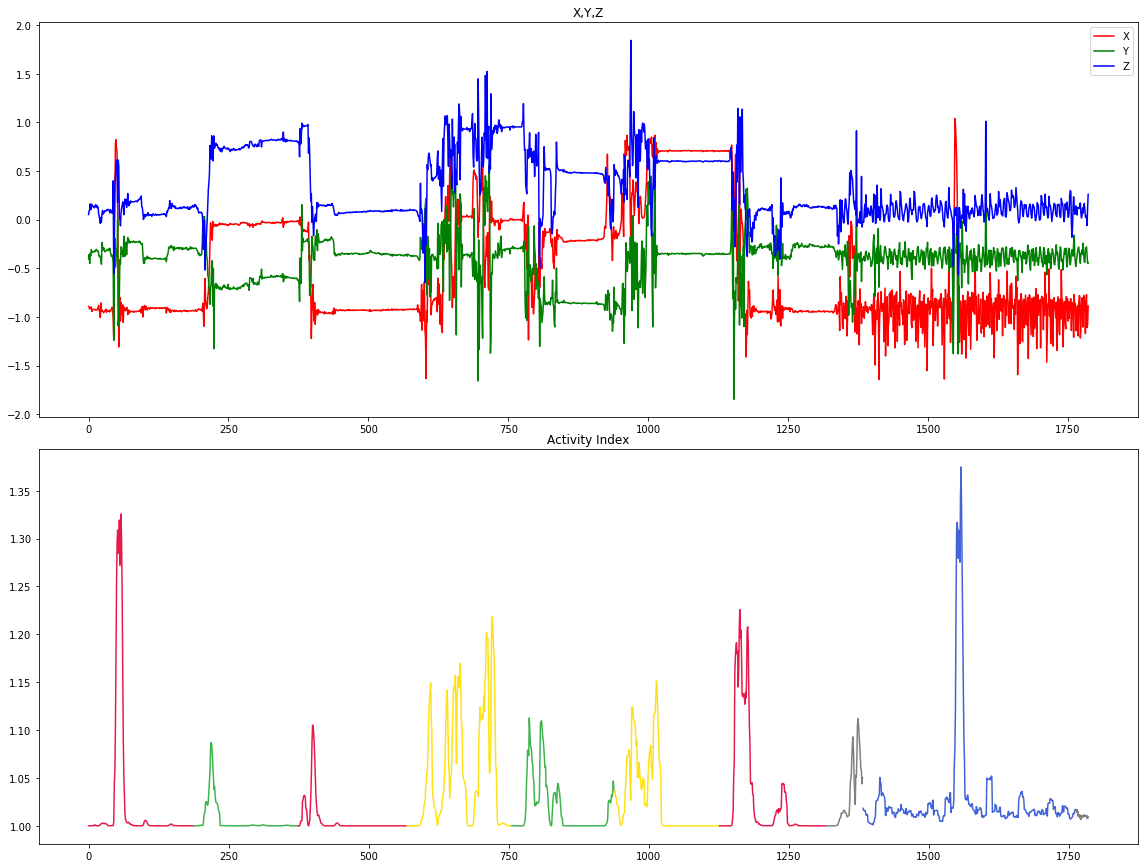

<Figure size 1080x1440 with 0 Axes>

In [18]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(calc_sec(dict1['timestamp'][i].split(' ')[1])>calc_sec(start_time)+ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
            
        elif(ts_cnt==len(lb_color)-1):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])

ax.set_title('Activity Index')

# ax = axes[2]
# ax.plot(dict1['HR'],label='HR')
# ax.set_ylim(bottom=30,top=110)
# ax.legend(loc='upper right')
# ax.set_title('Heart Rate')


plt.figure(figsize=(15,20))
fig.savefig('testrun_' + subject_name + '.png', dpi = 300)

plt.show()

## Calculate Roll, Pitch, Yaw Angles

In [19]:
import math

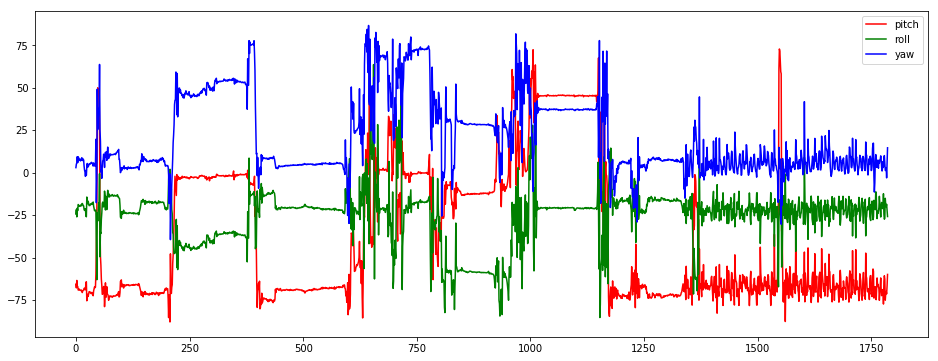

In [20]:
ax = np.array(dict1['x'])
ay = np.array(dict1['y'])
az = np.array(dict1['z'])

pitch = 180 * np.arctan(ax/np.sqrt(ay*ay + az*az))/math.pi
roll = 180 * np.arctan(ay/np.sqrt(ax*ax + az*az))/math.pi
yaw = 180 * np.arctan(az/np.sqrt(ax*ax + ay*ay))/math.pi

plt.figure(figsize=(16,6))
plt.plot(pitch,color='r',label='pitch')
plt.plot(roll,color='g',label='roll')
plt.plot(yaw,color='b',label='yaw')
plt.legend()

plt.show()

## Classify Walking Period

In [21]:
def fluc(axis,rs,rf,diff=0.15):
    cnt = 0
    mult = 0
    j = 1

    i = rs
    while(i<rf):
        if(abs(df1[axis][i+j]-df1[axis][i])>diff):
            if(cnt==0):
                if(df1[axis][i+j]>df1[axis][i]):
                    mult = 1
                else:
                    mult = -1
                cnt += 1
            else:
                if((df1[axis][i+j]>df1[axis][i] and mult==-1) or 
                   (df1[axis][i+j]<df1[axis][i] and mult==1)):
                    mult *= -1
                    cnt += 1
            i += j-1  
        else:
            if(cnt==0):
                if(df1[axis][i+j]>df1[axis][i]):
                    mult = 1
                else:
                    mult = -1
        i += 1

    return cnt

In [22]:
step = 10
s = 0
f = len(df1)

thres = 2

walk = [set()]
arr = [[]]
ax = ['x']
axes = 1

for i in range(s,f,step):
    for j in range(axes):
        if(i+step<f):
            arr[j].append(fluc(ax[j],i,i+step,diff=0.15))
        else:
            arr[j].append(fluc(ax[j],i,f-1,diff=0.15))
        if(len(arr[j])>=6 and 
           arr[j][-6]>=thres and arr[j][-5]>=thres and 
           arr[j][-4]>=thres and arr[j][-3]>=thres and 
           arr[j][-2]>=thres and arr[j][-1]>=thres):
            for k in range(6):
                walk[j].add(i-k*step)
        
for i in range(axes):
    walk[i] = list(walk[i])
    walk[i] = sorted(walk[i])

In [23]:
# walk_ = intersection(walk[0],walk[1])
# walk_its = intersection(walk_,walk[2])
walk_its = walk[i]

print(walk_its)

[1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780]


In [24]:
class period:
    def __init__(self,s,f):
        self.s = s
        self.f = f

In [25]:
walk_its_p = []
kp = walk_its[0]

for i in range(len(walk_its)):
    if(i+1<=len(walk_its)-1 and walk_its[i+1]-walk_its[i]>step):
        walk_its_p.append(period(kp,walk_its[i]))
        kp = walk_its[i+1]

    if(i==len(walk_its)-1 and walk_its[i]-walk_its[i-1]==step):
        walk_its_p.append(period(kp,walk_its[i]))

for x in walk_its_p:
    print(x.s,x.f)

1400 1780


1


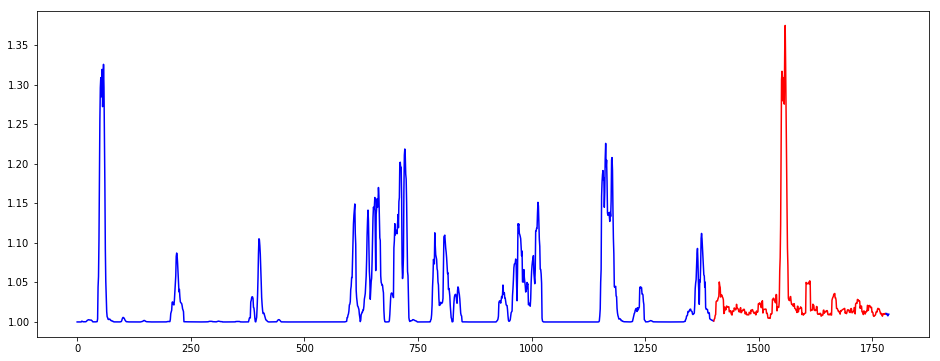

In [26]:
x_axis = []
y_axis = []

p_idx = 0

fig = plt.figure(figsize=(16,6))

print(len(walk_its_p))
for i in range(len(df1)):
    if(p_idx<len(walk_its_p)):
        if(i>=walk_its_p[p_idx].s and i<=walk_its_p[p_idx].f):
    #         print('r',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].f):
            plt.plot(x_axis,y_axis,color='r')
            x_axis = []
            y_axis = []
            p_idx += 1

    if(p_idx<len(walk_its_p)):
        if(i<=walk_its_p[p_idx].s):
    #         print('b++',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].s):
            plt.plot(x_axis,y_axis,color='b')
            x_axis = []
            y_axis = []
            
    else:
        x_axis.append(i)
        y_axis.append(ai1[i])
        if(i==len(df1)-1):
            plt.plot(x_axis,y_axis,color='b')
    
fig.savefig(subject_name + '_walking.png')
plt.show()

In [33]:
for i in walk_its_p:
    print(i.s,i.f)
    for j in range(i.s,i.f+1):
        print(ai1[j])

1400 1780
1.0011825235411038
1.001298466215958
1.003526416611121
1.0044577907509402
1.0083115971704677
1.0092727005175084
1.0254462353667533
1.0263191786800312
1.026688091146197
1.0265785785771404
1.0291076016015657
1.030774509439599
1.0323840531791673
1.0505455579978362
1.0458502666333498
1.0436736393668484
1.031481033452541
1.034464033596685
1.0339775421809747
1.033810590464423
1.0313802972122113
1.0303638520667435
1.027895084234448
1.010642693975715
1.0111962434413908
1.0187810333725502
1.0179911751860573
1.0152029077374811
1.0162930089426148
1.020102026241965
1.0197059351255706
1.0187173654193298
1.018943466010939
1.0187986118917791
1.01924158438111
1.0127576461047971
1.0131753360390712
1.0142684801540993
1.014123829068185
1.0106828877454714
1.009466757344642
1.008699802946441
1.0137833260165852
1.0139485620993598
1.0132358994010533
1.0136016143059945
1.0177239279739005
1.0163453659929218
1.0160846867945093
1.0151869589538784
1.0164310844480304
1.022295399064019
1.0173463397586289


## Fourier Transform

In [28]:
a1 = np.array(ai1)
N = a1.shape[0]

T = 0.16
x_ = np.linspace(1/(T*(N-1)), 1/(2*T), (N+1)//2-1)
# x = np.linspace(1/(T*(N-1)), 1/T, N-1)

ft = np.fft.rfft(a1)

# print(ft)
print(ft.shape)
print(x_.shape)

(894,)
(893,)


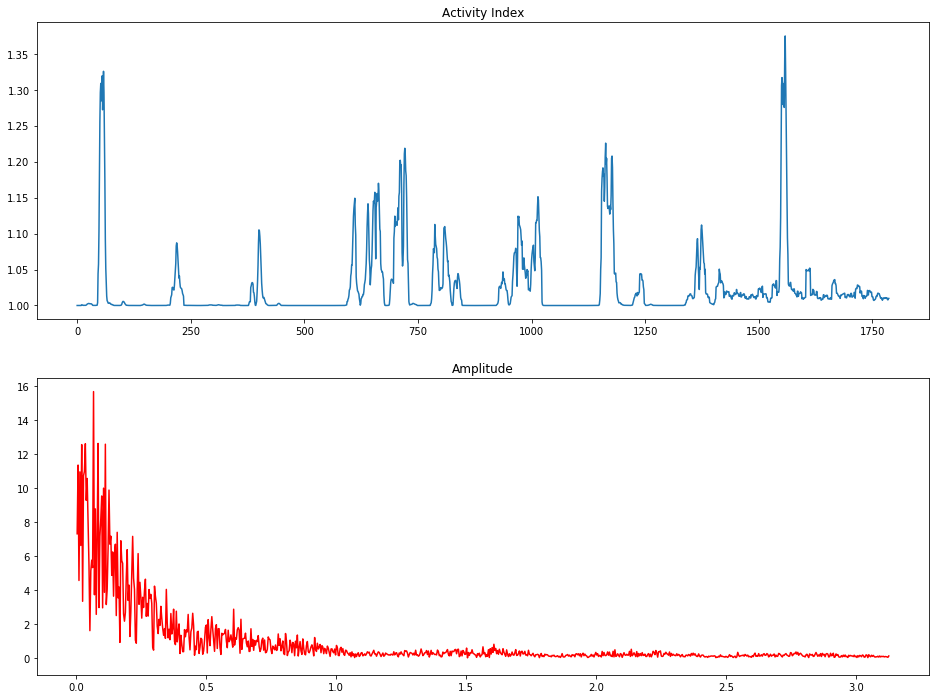

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))

ax = axes[0]
ax.plot(a1)
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(x_,np.abs(ft)[1:],color='r')
ax.set_ylim(bottom=-1)
ax.set_title('Amplitude')

# ax = axes[2]
# ax.plot(x,ft.imag[1:],'b')
# ax.set_title('Imaginary Part')

plt.show()
# fig.savefig('testrun_ped_fft.png',dpi=300)

85


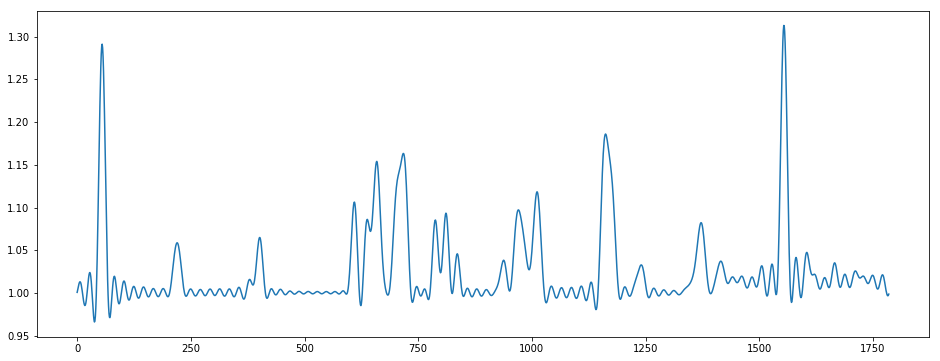

In [30]:
f = 0.3
r = int(N*T*f)

mask = np.zeros((N+1)//2)
mask[0:r+1] = 1
# mask[r:] = 1
print(r)

y_masked = np.fft.irfft(ft*mask)

plt.figure(figsize=(16,6))
plt.plot(np.abs(y_masked))
plt.show()

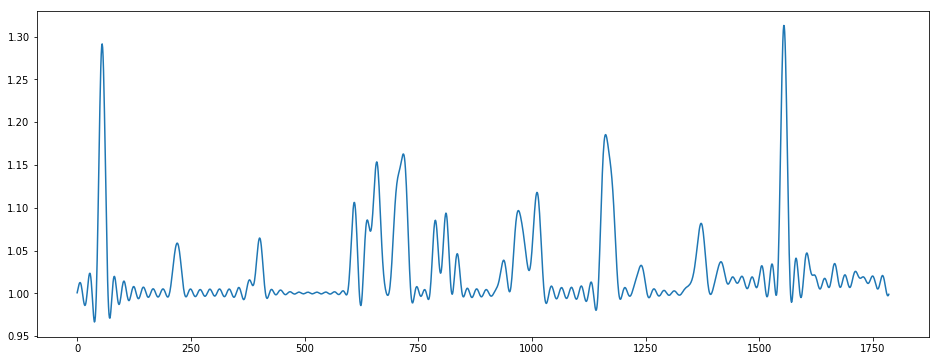

In [31]:
f1 = 0.3
f2 = 2.5

lo_mask = np.where(x_>f1)
med_mask = np.where((x_-f1)*(x_-f2)>=0)
hi_mask = np.where(x_<f2)

pos_mask = lo_mask

med_freq_fft = ft.copy()
med_freq_fft[pos_mask] = 0
filtered_sig = np.fft.irfft(med_freq_fft)

plt.figure(figsize=(16,6))
plt.plot(np.abs(filtered_sig))
plt.show()

# plt.savefig('mask_lowpass.png',dpi=300)